In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading


In [2]:
data=pd.read_csv("train.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df=data.copy()

In [7]:
df.head(3)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656


In [8]:
df.shape

(700, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Data preprocessing

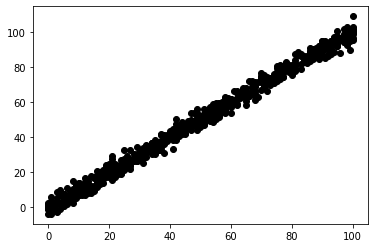

In [10]:
import matplotlib.pyplot as plt
x = df.x
y = df.y
plt.plot(x,y, 'o', color = 'black')
plt.show()

In [13]:
print("number of record in dataset is {}".format(len(df)))

number of record in dataset is 700


In [14]:

df.isnull().sum()

x    0
y    1
dtype: int64

In [15]:
df.dropna(inplace = True)
df.isnull().sum()

x    0
y    0
dtype: int64

In [16]:
x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=140)

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

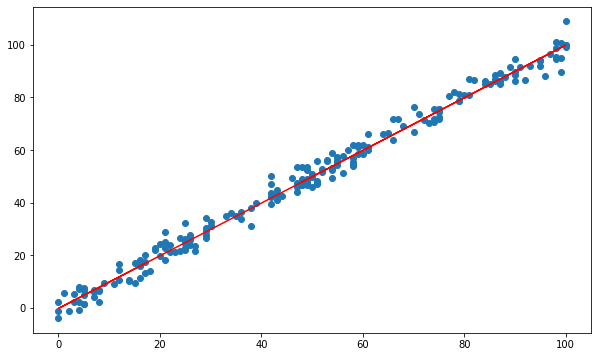

In [27]:
y_predict = lm.predict(x_test)
plt.subplots(figsize=(10, 6))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,c='r')

In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

0.988733047486131

In [1]:
residual = []
for i in range(len(y_test)):
    residual.append(y_predict[i] - y_test[i])
residual = [item[0] for item in residual]
# frequency distribution historigam
#print(min(residual), max(residual))
#print(residual)
plt.hist(residual, bins=20, facecolor="blue", edgecolor="black", alpha=0.7 )
plt.title("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXAAAAEICAYAAABGaK+TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAZ20lEQVR4nO3de7xcZX3v8c9XbsrllEB2INkkbKuUEtsS4xbxBfZwxAtQEUxR4VBMJRps5RR67PECFoJgC+1BbQ94CUJNuYMECRysUMRSe2o00ISLCZLs7piQwA5guGsI/s4f69mwMpm9Z/bM7Jl5ku/79dqvPbOuv3lmre+seWbNGkUEZmaWn9d0ugAzM2uMA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcNuCpO9Kmt2iZb1D0sOl+4OS3tWKZaflPSTpiFYtb4zrblk71bGu5yT9ZjvW1ShJr5N0q6SnJd3YxvWeJembo4xvyTYn6Y8l/bDZ5bTaNh/g6Ql8Me0Ew39TOl1XJ0gKSc+nNnhS0l2SPlyeJiKOjogFdS7rjaNNExH/GhEHNlt3Wt+3JF1Qsfw3RcQPWrH8inX9QNLHKoYdIWltad0ta6daImL3iBhoZhltcAKwD7B3RHywcqSkeZJeStveRkn/T9Lbm11pRPxVRHys9pTbpm0+wJNj004w/LeucgJJO3aisA44OCJ2Bw4EvgVcIuncVq9kO2rPcZNZG+4P/CwiNo8yzfVp25sI3A207Uh9W7W9BPhWJPWlo6M5kn4OfD8NPzQdHWyUtKz8Fl3S6yX9i6RnJd0p6RJJV6VxWxyhpWGvvH2T9BpJn5W0Kh393iBpr4paZkv6uaQnJJ1dWs4O6a3iqrTueyVNlXSppIsr1nmrpDNrPf6IeCIirgT+BPicpL3T/K8cfUp6Y3q8T6eark/D70mLWZaOqD48/PglfUbSY8A/VGsT4K2SfirpF5L+QdJr0zK3eos6fPQqaS5wMvDptL5bq7TvLpK+Imld+vuKpF3Kz42kT0kakrRe0kdrtdFoGm2nNPzjklZKekrSovI7wvSYPynpEeCRcjuk23un5/gZST+RdEG53ST9naQ1afy9kt5RGjdP0o2Srkrb0QOSfkvS51K7rJH0nlEe80HpcW9U0X31/jT8POAc4MPpcc4Zre1SyF8N9ErqKS3/fZKW6tUj9N8rjfuMpEdT3Q9LOrL0mK4qTXeKpNVpHzu7vF5VvIur3D716v75bNpGPzDa4+gG222Al/xX4CDgvZJ6gf8LXADsBfwFcFNpI7sGuJfiCOJ8YCx9oH8GHJ/WNwX4BXBpxTSHUxwZHwmcI+mgNPx/AicBxwD/BTgVeAFYAJwk6TUAkiamea8dQ123ADsCh1QZdz5wBzAB2A/4PwAR8ftp/MHpHc316f6+FO22PzB3hPWdDLwXeAPwW8DnaxUYEfMpdvi/Ses7tspkZwOHAjOAg9PjKS97X+A3gF5gDnCppAm11l2nuttJ0juBvwY+BEwGVgPXVSzveOBtwPQq67oUeD49ntlsvQ3+hKIN9qLYXm8cfpFMjgWuTLX+B/A9ihzoBb4AfKPaA5S0E3BrepyTgP8BXC3pwIg4F/gr0hF2RFxebRmlZe0MfAR4kmI/QNJM4ArgNGDvVMei9MJ8IHA68NaI2INi+xmsstzpwNeAUyj2sb0pno96rQLeQbGdnAdcJWnyGOZvu+0lwL+TXtU3SvpOxbh5EfF8RLwI/BFwe0TcHhG/jog7gSXAMZKmAW8F/jIifhUR91Bs0PU6DTg7ItZGxK+AecAJ2vJt8nkR8WJELAOWUQQRwMeAz0fEw1FYFhFPRsSPgacpQhvgROAHEfF4vUVFxEvAExQ7fKWXKMJ4SkT8MiJqfYjza+Dc1D4vjjDNJRGxJiKeAr5I8cLUCicDX4iIoYjYQLEDnlIa/1Ia/1JE3A48R/FiOZK/L20zG4HbRpl2LO10MnBFRNyXtoPPAW+X1Fea5q8j4qnKNpS0A/CHFG38QkT8lOJF/BURcVXaNjZHxMXALhWP818j4nvpKPhGoAe4MG0H1wF9kvasUvehwO5p2k0R8f3UJmN5/j6U2vJF4OPACaUul48D34iIxRHxcvp84VdpvS+nxzFd0k4RMRgRq6os/wTgtoi4J7XtX1Jsk3WJiBsjYl3a96+neAdU7cCma2wvAX58ROyZ/o6vGLemdHt/4IMVO+7hFEdKU4BfRMTzpelXj6GG/YGbS8tdTrFh7lOa5rHS7RcodhiAqRRHB9UsoHjhIf2/cgw1DR9Z9QBPVRn9aUDAj9Nb5lNrLG5DRPyyxjTl9l5N0a6tMIUtn4/KZT9Z0T9bbt9q/qy0zewJvG+UacfSTlvUGRHPURyJ9pamWVM5U9JD8W5pzUjTpm6i5ak7ZyPF0eTE0iTlF/cXgSci4uXSfajeLlOANRFRDsTVFXXXckNqy32AB4G3lMbtD3yqYt+bSvGiuBI4k+KgZ0jSdap+IsIUSu2R9tUn6y1O0kdKXTgbgd9hy7brOttLgI+mfDnGNcCV5R03InaLiAuB9cAESbuVpp9Wuv08sOvwnXS01FMavwY4umLZr42IR+uocQ1Fl0M1VwHHSTqYoiuo8h1GLccBm4EfV46IiMci4uMRMYXiHcRXNfoZFfVc2nJq6fY0YPgD5cr223eMy15HEQLVlj2uxthOW9SZtqe9gfJ2MNJj3UDxXJW7BV5pz9Tf/RmK7pkJKSyfpnhxadY6YOpwd10yraLuukTEExTtNK/URbEG+GLF/rFrRFyb5rkmIg6naLsALqqy6PVs2R67UrTtsC22MYpuqOFp9wcuo+iq2Tu13YO0pu3GjQN8S1cBx0p6r4oPDl+bPujYLyJWU3SnnCdpZ0mHU/QnDvsZ8FpJf5COaj9P8bZv2NeBL6YNBUk9ko6rs65vAudLOkCF31P60DEi1lL0e14J3DRK18UWJO0l6WSKPtWLImKrIxVJH5Q0HBa/oNhxho/WHgcaOTf5k5L2U/EB7lnAcP/5MuBNkmakPtt5FfPVWt+1wOdTu06k+FDtqlGmb5kxttM1wEfT49yFou94cUQM1lpPOlJeSBF8u0r6bYq+5GF7UAT8BmBHSedQfGbSCospAvDTknZS8eH+sWzdf1+XiFhB0f/+6TToMuATkt6WtvHd0r60h6QDJb0ztdcvKd4pvFxlsd8G3ifp8NTP/gW2zLilFN2he6UDhPKH/btRPG8bAFR8yP07jTy2dnKAl0TEGooj0rMonsg1wP/i1Xb67xQfLj0FnAv8Y2nep4E/pQjbRyk29vIZGH8HLALukPQs8KO0rHp8CbiB4gOkZ4DLgdeVxi8Afpf6uk+WSXoOWEnRt/7nEXHOCNO+FVicpl8EnBER/5nGzQMWpLebH6rzcUARYHcAA+nvAoCI+BnFDvfPFH2Plf3Il1P0gVb7HIO0nCXA/cADwH3Dy26DutspIu6i6Ju9ieKI8Q0Un13U63SKbpHHKJ7vayn6iqEIxO9SHEyspgi7kbpjxiQiNgHvB46m+Mzkq8BHUhA36m+BuZImRcQSin7wSyheBFcCf5ym2wW4MK33MYoPUc+qUuNDwCcptrH1aTnlffBKigOFQYpt8PrSvD8FLgb+neJF93eBf2visbWFwj/o0DBJ84A3RsQf1Zp2nOv4fYqjzb6KPkrbxkm6CNg3ItryrVDrLj4Cz1zqrjkD+KbDe9sn6bdTF5okHUJxSuTNna7LOsMBnjEV54lvpDhL5isdLsfaYw+KfvDnKbrVLqY4l9+2Q+5CMTPLlI/Azcwy1daL5UycODH6+vrauUozs+zde++9T0RET+XwtgZ4X18fS5YsaecqzcyyJ6nqt77dhWJmlikHuJlZphzgZmaZcoCbmWXKAW5mlikHuJlZphzgZmaZcoCbmWXKAW5mlqm2fhPTrFvNmjWHwcGhhufv65vEwoWj/hi7Wcs5wM2AwcEhentvbWL+Y2tPZNZi7kIxM8tUzQBPP+z7Y0nLJD0k6bw0/PWSFkt6RNL16UdEzcysTeo5Av8V8M6IOBiYARwl6VDgIuDLEXEAxY+Hzhm/Ms3MrFLNAI/Cc+nuTukvgHcC307DFwDHj0uFZmZWVV194JJ2kLQUGALuBFYBGyNic5pkLdA7wrxzJS2RtGTDhg2tqNnMzKgzwCPi5YiYAewHHAIcVG2yEeadHxH9EdHf07PVD0qYmVmDxnQWSkRsBH4AHArsKWn4NMT9gHWtLc3MzEZTz1koPZL2TLdfB7wLWA7cDZyQJpsN3DJeRZqZ2dbq+SLPZGCBpB0oAv+GiLhN0k+B6yRdAPwH4K+hmZm1Uc0Aj4j7gTdXGT5A0R9uZmYd4G9impllygFuZpYpB7iZWaYc4GZmmXKAm5llygFuZpYpB7iZWaYc4GZmmXKAm5llygFuZpYpB7iZWaYc4GZmmXKAm5llygFuZpapeq4HbpaFWbPmMDg41NC8AwOr6a36q65m3csBbtuMwcEhentvbWjeFSumt7gas/HnLhQzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0zVDHBJUyXdLWm5pIcknZGGz5P0qKSl6e+Y8S/XzMyG1fNV+s3ApyLiPkl7APdKujON+3JE/O/xK8/MzEZSM8AjYj2wPt1+VtJywJf9MTPrsDH1gUvqA94MLE6DTpd0v6QrJE0YYZ65kpZIWrJhw4amijUzs1fVHeCSdgduAs6MiGeArwFvAGZQHKFfXG2+iJgfEf0R0d/T09OCks3MDOoMcEk7UYT31RGxECAiHo+IlyPi18BlwCHjV6aZmVWq5ywUAZcDyyPiS6Xhk0uTfQB4sPXlmZnZSOo5C+Uw4BTgAUlL07CzgJMkzQACGAROG5cKzcysqnrOQvkhoCqjbm99OWZmVi9/E9PMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8tUzQCXNFXS3ZKWS3pI0hlp+F6S7pT0SPo/YfzLNTOzYfUcgW8GPhURBwGHAp+UNB34LHBXRBwA3JXum5lZm9QM8IhYHxH3pdvPAsuBXuA4YEGabAFw/HgVaWZmW9txLBNL6gPeDCwG9omI9VCEvKRJI8wzF5gLMG3atGZqtUzMmjWHwcGhhubt65vEwoWXt7gis21T3QEuaXfgJuDMiHhGUl3zRcR8YD5Af39/NFKk5WVwcIje3lsbnPfYFldjtu2q6ywUSTtRhPfVEbEwDX5c0uQ0fjLQ2CGXmZk1pJ6zUARcDiyPiC+VRi0CZqfbs4FbWl+emZmNpJ4ulMOAU4AHJC1Nw84CLgRukDQH+DnwwfEp0czMqqkZ4BHxQ2CkDu8jW1uOmZnVy9/ENDPL1JhOIzSz1vNpl9YoB7hZh/m0S2uUu1DMzDLlADczy5QD3MwsUw5wM7NMOcDNzDLls1CsqwwMrGLmzMbOrBgYWE1vb4sLMutiDnDrKps20fApdStWTG9xNWbdzV0oZmaZcoCbmWXKAW5mlikHuJlZpvwhpm2lmYsrgc8GaadmztrxhbDy5wC3rTRzcSXw2SDt1MxZO74QVv7chWJmlikHuJlZphzgZmaZcoCbmWXKAW5mlikHuJlZphzgZmaZcoCbmWWqZoBLukLSkKQHS8PmSXpU0tL0d8z4lmlmZpXqOQL/FnBUleFfjogZ6e/21pZlZma11AzwiLgHeKoNtZiZ2Rg00wd+uqT7UxfLhJZVZGZmdWn0YlZfA84HIv2/GDi12oSS5gJzAaZNm9bg6sy6m3/L0zqhoQCPiMeHb0u6DLhtlGnnA/MB+vv7o5H1mXU7/5andUJDXSiSJpfufgB4cKRpzcxsfNQ8Apd0LXAEMFHSWuBc4AhJMyi6UAaB08axRjMzq6JmgEfESVUG+2c8zMw6zN/ENDPLlAPczCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuUANzPLVM1fpbfOmTVrDoODQw3N29c3iYULL29xRWbWTRzgXWxwcIje3lsbnPfYFldjZt3GXShmZplygJuZZapmgEu6QtKQpAdLw/aSdKekR9L/CeNbppmZVarnCPxbwFEVwz4L3BURBwB3pftmZtZGNQM8Iu4BnqoYfBywIN1eABzf4rrMzKyGRvvA94mI9QDp/6SRJpQ0V9ISSUs2bNjQ4OrMzKzSuH+IGRHzI6I/Ivp7enrGe3VmZtuNRgP8cUmTAdL/xr5tYmZmDWs0wBcBs9Pt2cAtrSnHzMzqVc9phNcC/w4cKGmtpDnAhcC7JT0CvDvdNzOzNqr5VfqIOGmEUUe2uBYzMxsDfxPTzCxTDnAzs0w5wM3MMuUANzPLlAPczCxTDnAzs0w5wM3MMuWfVNtGDQysYubMxn5WbWBgNb29LS7Iuk4z24h/c7U7OMC3UZs20fDvaa5YMb3F1Vg3amYb8W+udgd3oZiZZcoBbmaWKQe4mVmmHOBmZplygJuZZcoBbmaWKQe4mVmmHOBmZplygJuZZcoBbmaWKQe4mVmmHOBmZplygJuZZcoBbmaWKQe4mVmmmroeuKRB4FngZWBzRPS3oigzM6utFT/o8N8i4okWLMfMzMbAXShmZplq9gg8gDskBfCNiJhfOYGkucBcgGnTpjW5OjPrBs38nib4NzVbpdkAPywi1kmaBNwpaUVE3FOeIIX6fID+/v5ocn1m1gWa+T1N8G9qtkpTXSgRsS79HwJuBg5pRVFmZlZbwwEuaTdJewzfBt4DPNiqwszMbHTNdKHsA9wsaXg510TEP7WkKjMzq6nhAI+IAeDgFtZiZmZj4NMIzcwy5QA3M8uUA9zMLFMOcDOzTDnAzcwy5QA3M8uUA9zMLFMOcDOzTLXieuBtMWvWHAYHhxqat9krnzWz7sceW8u+++7X0LwDA6vp7W1oVjPbDmQT4IODQw1f/azZK581s+4VK6bzlrc0Pq+Z2UjchWJmlikHuJlZphzgZmaZcoCbmWXKAW5mlikHuJlZphzgZmaZcoCbmWXKAW5mlikHuJlZphzgZmaZyuZaKM0YGFjFzJmNXw/FF5Uya61m9slmLhDXqXmh+YvqVbNdBPimTTR8MSrwRaXMWq2ZfbLZC8R1Yl5o/qJ61bgLxcwsUw5wM7NMNRXgko6S9LCklZI+26qizMystoYDXNIOwKXA0cB04CRJ7iw2M2uTZo7ADwFWRsRARGwCrgOOa01ZZmZWiyKisRmlE4CjIuJj6f4pwNsi4vSK6eYCc9PdA4GHGy933E0Enuh0EXVwna2XS62us7VyqXP/iOipHNjMaYSqMmyrV4OImA/Mb2I9bSNpSUT0d7qOWlxn6+VSq+tsrVzqHEkzXShrgaml+/sB65orx8zM6tVMgP8EOEDS6yXtDJwILGpNWWZmVkvDXSgRsVnS6cD3gB2AKyLioZZV1hlZdPXgOsdDLrW6ztbKpc6qGv4Q08zMOsvfxDQzy5QD3MwsU9t1gEu6XtLS9DcoaekI0w1KeiBNt6QDdc6T9Gip1mNGmK6jlzaQ9LeSVki6X9LNkvYcYbqOtGet9pG0S9omVkpaLKmvXbWVapgq6W5JyyU9JOmMKtMcIenp0vZwTrvrLNUy6nOpwt+nNr1f0swO1Hhgqa2WSnpG0pkV03RNm45JRPiv+BzgYuCcEcYNAhM7WNs84C9qTLMDsAr4TWBnYBkwvc11vgfYMd2+CLioW9qznvYB/hT4erp9InB9B57rycDMdHsP4GdV6jwCuK3dtTXyXALHAN+l+N7IocDiDte7A/AYxRdjurJNx/K3XR+BD5Mk4EPAtZ2upQkdv7RBRNwREZvT3R9RfDegW9TTPscBC9LtbwNHpm2jbSJifUTcl24/CywHcv45keOAf4zCj4A9JU3uYD1HAqsiYnUHa2gZB3jhHcDjEfHICOMDuEPSvenSAJ1wenoLeoWkCVXG9wJrSvfX0tkd/1SKI69qOtGe9bTPK9OkF6Kngb3bUl0VqQvnzcDiKqPfLmmZpO9KelNbC9tSreey27bLExn5QK1b2rRu2/wv8kj6Z2DfKqPOjohb0u2TGP3o+7CIWCdpEnCnpBURcU+76gS+BpxPsbOcT9Hdc2rlIqrM2/JzROtpT0lnA5uBq0dYzLi3ZxX1tE9b2rAeknYHbgLOjIhnKkbfR9EF8Fz6POQ7wAHtrjGp9Vx2U5vuDLwf+FyV0d3UpnXb5gM8It412nhJOwKzgLeMsox16f+QpJsp3o63NHBq1TlM0mXAbVVGteXSBnW052zgfcCRkToXqyxj3NuzinraZ3iatWm7+A3gqXGuayuSdqII76sjYmHl+HKgR8Ttkr4qaWJEtP2iTHU8l910yY2jgfsi4vHKEd3UpmPhLhR4F7AiItZWGylpN0l7DN+m+KDuwTbWR0Wf4QdGWH/HL20g6SjgM8D7I+KFEabpVHvW0z6LgNnp9gnA90d6ERovqc/9cmB5RHxphGn2He6bl3QIxX78ZPuqfKWOep7LRcBH0tkohwJPR8T6Npc6bMR32t3SpmO1zR+B12GrPjFJU4BvRsQxwD7Azem53RG4JiL+qc01/o2kGRRvPQeB0yrrjO64tMElwC4Ub6UBfhQRn+iG9hypfSR9AVgSEYsogvNKSSspjrxPHO+6qjgMOAV4QK+e1noWMA0gIr5O8eLyJ5I2Ay8CJ7b7hSap+lxK+kSp1tspzkRZCbwAfLQDdSJpV+DdpH0nDSvX2S1tOib+Kr2ZWabchWJmlikHuJlZphzgZmaZcoCbmWXKAW5mlikHuJlZphzgZmaZ+v8FPGwhg+dzzwAAAABJRU5ErkJggg==Frequency Distribution Historigam of Residual")
plt.show()

NameError: name 'y_test' is not defined

In [30]:
data1=pd.read_csv("test.csv")
data1

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [31]:
df1=data1.copy()

In [32]:
df1.head(3)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262


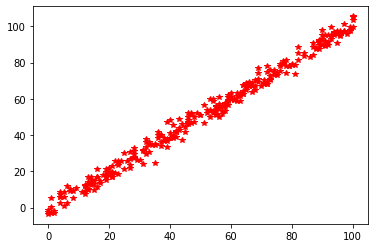

In [42]:
x1=df1.x
y1=df1.y
plt.plot(x1,y1,"*",color="red")


In [34]:
df1.dropna(inplace=True)
df1.isnull().sum()

x    0
y    0
dtype: int64

In [43]:
x1=df1.x.values.reshape(-1,1)
y1=df1.y.values.reshape(-1,1)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=140)

In [45]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()

In [46]:
lm1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

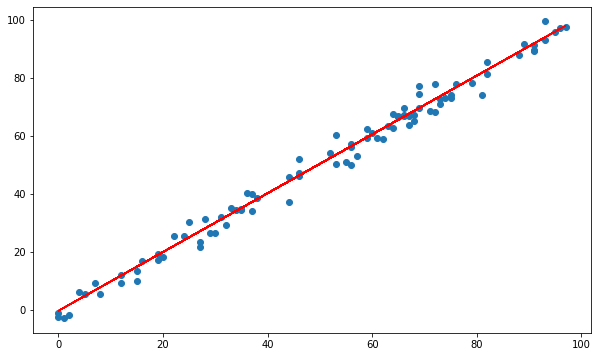

In [47]:
y_predict = lm1.predict(x_test)
plt.subplots(figsize=(10, 6))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,c='r')

In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

0.9876483204990455

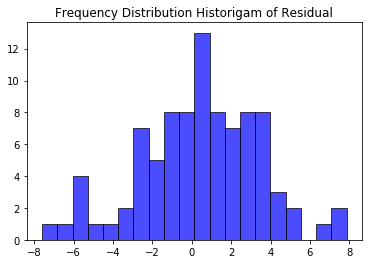

In [49]:
residual = []
for i in range(len(y_test)):
    residual.append(y_predict[i] - y_test[i])
residual = [item[0] for item in residual]
# frequency distribution historigam
#print(min(residual), max(residual))
#print(residual)
plt.hist(residual, bins=20, facecolor="blue", edgecolor="black", alpha=0.7 )
plt.title("Frequency Distribution Historigam of Residual")
plt.show()